In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('spam.tsv',sep='\t')

In [20]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [21]:
df.isnull().any()

label      False
message    False
length     False
punct      False
dtype: bool

In [22]:
len(df)

5572

In [23]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Balance this data

In [24]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [25]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [26]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [27]:
ham=ham.sample(spam.shape[0])

In [28]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [29]:
data=ham.append(spam,ignore_index=True)
data.head()

,label,message,length,punct
0,ham,O. Guess they both got screwd,29,1
1,ham,Still chance there. If you search hard you wil...,73,5
2,ham,Once free call me sir. I am waiting for you.,44,2
3,ham,I'm really not up to it still tonight babe,42,1
4,ham,Dont put your phone on silent mode ok,37,0


In [30]:
data.tail()


,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


### Exploratory Data Analysis

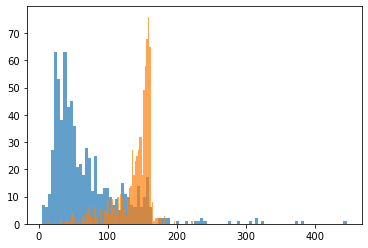

In [32]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

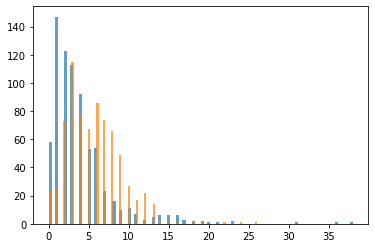

In [33]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

### Data Preparation

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
data.head()

,label,message,length,punct
0,ham,O. Guess they both got screwd,29,1
1,ham,Still chance there. If you search hard you wil...,73,5
2,ham,Once free call me sir. I am waiting for you.,44,2
3,ham,I'm really not up to it still tonight babe,42,1
4,ham,Dont put your phone on silent mode ok,37,0


In [47]:
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True,stratify=data['label'])

In [48]:
X_train

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742                      Wat happened to the cruise thing
477               U having lunch alone? I now so bored...
542     Jus finish blowing my hair. U finish dinner al...
1277    Ringtone Club: Gr8 new polys direct to your mo...
789     HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
1319    FREEMSG: Our records indicate you may be entit...
736                              LOL ... No just was busy
140     Ambrith..madurai..met u in arun dha marrge..re...
1005    FREE NOKIA Or Motorola with upto 12mths 1/2pri...
702     You said not now. No problem. When you can. Le...
964     Thanks for the Vote. Now sing along with the s...
1480    Get your garden ready for summer with a FREE s...
90      Talk With Yourself Atleast Once In A Day...!!!...
276     Life spend with someone for a lifetime may be ...
200     For The First Time In The History 'Need' 'Comf...
568                                             Ok can...
586     The gr

In [40]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
789     spam
1319    spam
736      ham
140      ham
1005    spam
702      ham
964     spam
1480    spam
90       ham
276      ham
200      ham
568      ham
586      ham
1099    spam
214      ham
271      ham
845     spam
801     spam
1053    spam
428      ham
1214    spam
590      ham
389      ham
1007    spam
557      ham
        ... 
1209    spam
113      ham
48       ham
613      ham
0        ham
369      ham
325      ham
253      ham
1437    spam
683      ham
634      ham
465      ham
647      ham
162      ham
534      ham
1091    spam
499      ham
103      ham
624      ham
516      ham
405      ham
1171    spam
1069    spam
22       ham
364      ham
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: label, Length: 1045, dtype: object

In [41]:
### Bag of Words Creation
vectorizer=TfidfVectorizer()

In [42]:
X_train=vectorizer.fit_transform(X_train)

In [43]:
X_train.shape

(1045, 3628)

In [44]:
X_train

<1045x3628 sparse matrix of type '<class 'numpy.float64'>'
	with 17459 stored elements in Compressed Sparse Row format>

### Pipeline and Random Forest Classifier

In [46]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [49]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [50]:
y_pred=clf.predict(X_test)

In [51]:
confusion_matrix(y_test,y_pred)

array([[221,   4],
       [ 27, 197]], dtype=int64)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.98      0.93       225
        spam       0.98      0.88      0.93       224

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449



In [54]:
accuracy_score(y_test,y_pred)

0.9309576837416481

In [55]:
clf.predict(['Hi,this is Aryamaan Pandey'])

array(['ham'], dtype=object)

In [59]:
clf.predict(['Congratulations!You have won free movie tickets to the USA this summer'])

array(['spam'], dtype=object)

### SVM

In [72]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1000,gamma='auto'))])

In [73]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [74]:
y_pred=clf.predict(X_test)

In [75]:
confusion_matrix(y_test,y_pred)

array([[222,   3],
       [ 19, 205]], dtype=int64)

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       225
        spam       0.99      0.92      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [77]:
accuracy_score(y_test,y_pred)

0.9510022271714922

In [78]:
clf.predict(['Hi,this is Aryamaan Pandey'])

array(['ham'], dtype=object)

In [79]:
clf.predict(['Congratulations!You have won free movie tickets to the USA this summer'])

array(['spam'], dtype=object)